# Customer Churn Project

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [3]:
df = pd.read_csv('customer_churn (1).csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.shape

(7043, 21)

In [13]:
11 / 7043 *100  # <- percentage missing values from "TotalCharges" column

0.1561834445548772

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for outliers

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

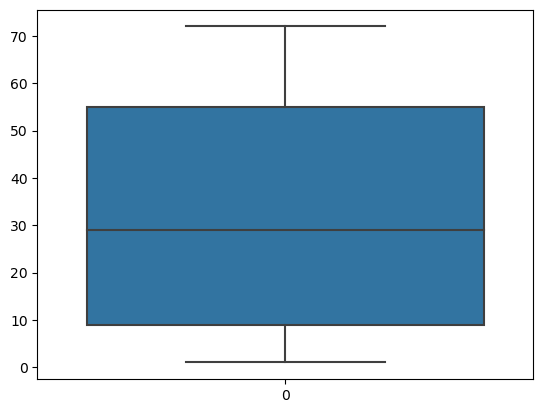

In [18]:
sns.boxplot(df['tenure'])

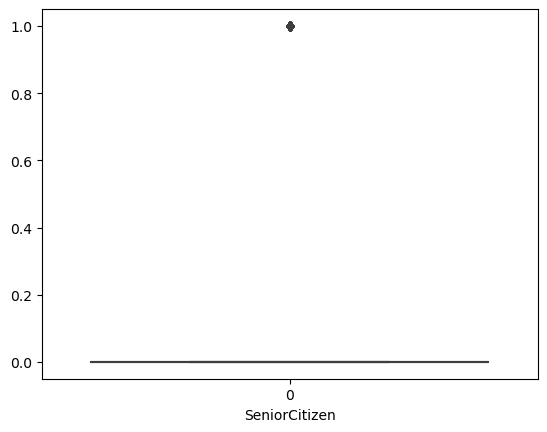

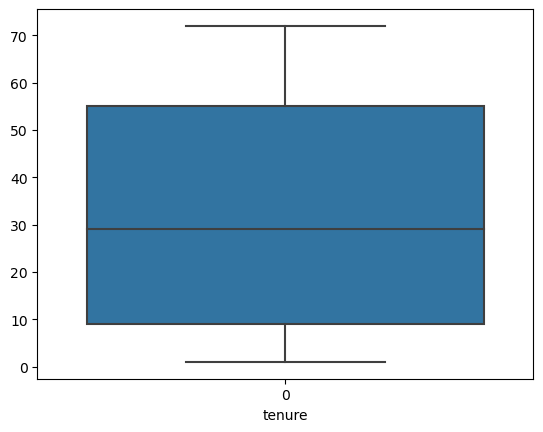

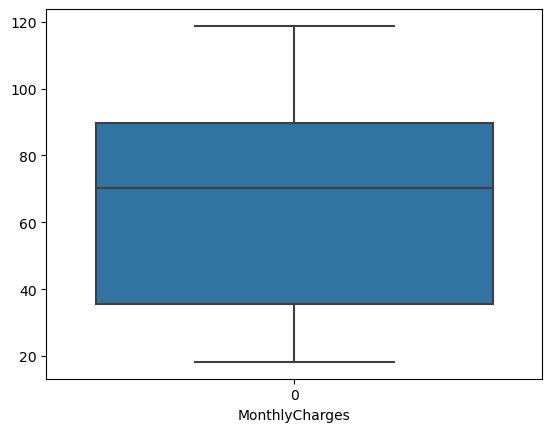

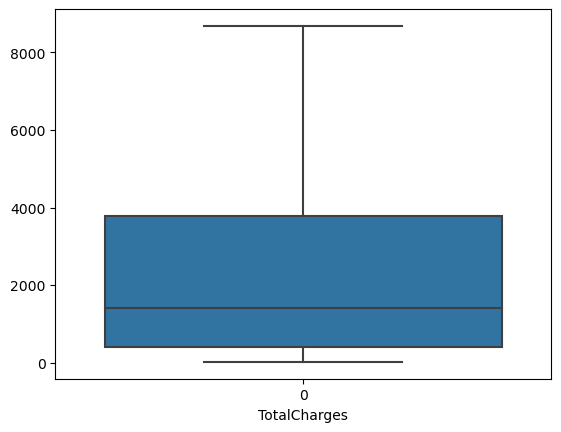

In [22]:
for col in df.columns:
    
    if df[col].dtype!='object':
        
        sns.boxplot(df[col])
        plt.xlabel(col)
        plt.show()

In [23]:
# Statical method <- IQR, LL, UL

# domain specific <- Indepth knowledge of data.

## Data Encoding

In [25]:
# Label Encoding  <- sklearn: LabelEncoder,  Pandas: mapping


# Onehot Encoding <- sklearn: OneHot Encoder, Pandas: get_dummies

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
for col in df.columns:
    
    if df[col].dtype == 'object':
        
        df[col]=le.fit_transform(df[col])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   int32  
 1   gender            7032 non-null   int32  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int32  
 4   Dependents        7032 non-null   int32  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int32  
 7   MultipleLines     7032 non-null   int32  
 8   InternetService   7032 non-null   int32  
 9   OnlineSecurity    7032 non-null   int32  
 10  OnlineBackup      7032 non-null   int32  
 11  DeviceProtection  7032 non-null   int32  
 12  TechSupport       7032 non-null   int32  
 13  StreamingTV       7032 non-null   int32  
 14  StreamingMovies   7032 non-null   int32  
 15  Contract          7032 non-null   int32  
 16  PaperlessBilling  7032 non-null   int32  


In [33]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [39]:
df.drop('customerID', axis=1, inplace=True)

### Correlations

In [34]:
# Simple correlation -> Correlation matrix

# Multiple Correlation -> VIF

#### Single Correlation

In [40]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<Axes: >

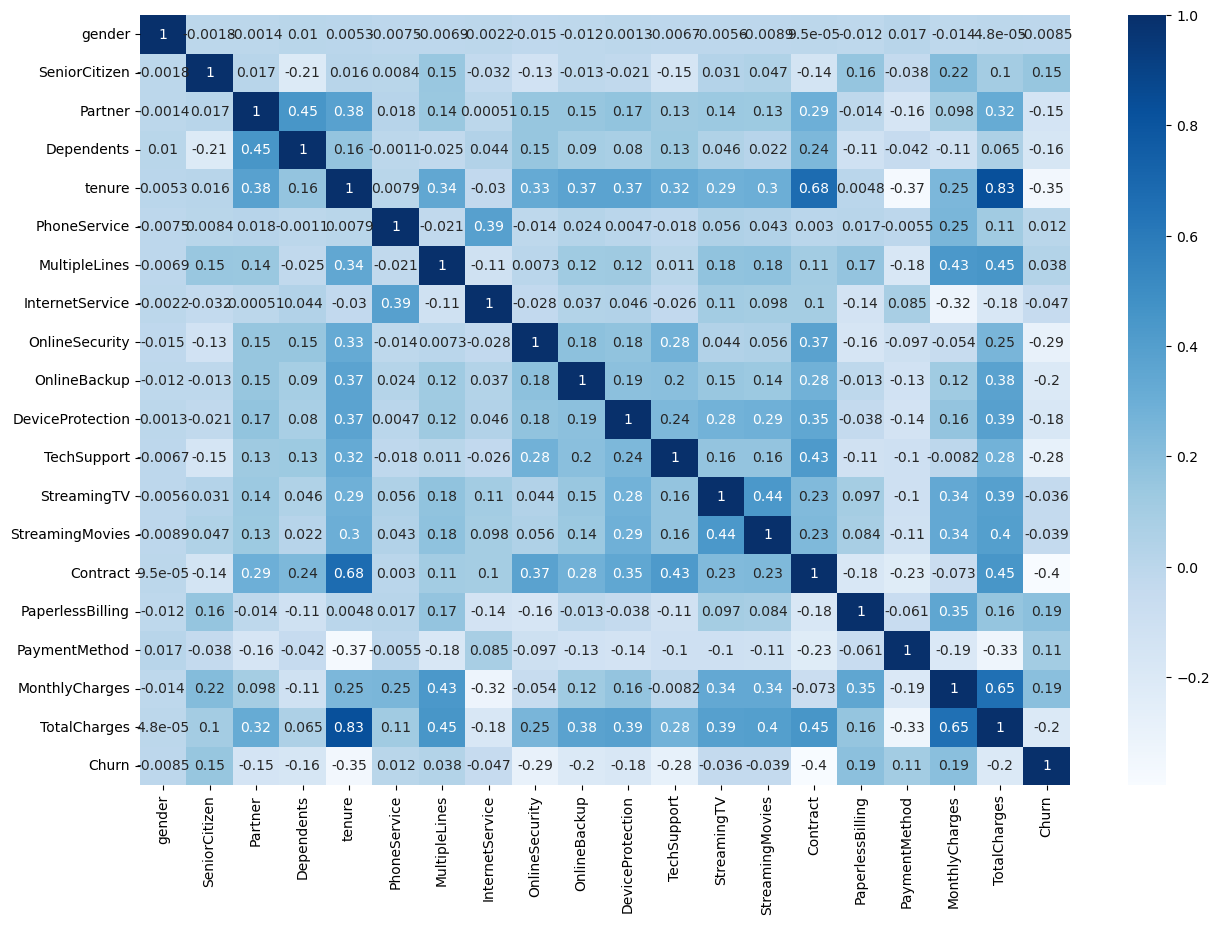

In [42]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True, cmap='Blues')

In [43]:
df.drop('TotalCharges', axis=1, inplace=True)

In [46]:
df.drop('tenure', axis=1, inplace=True)

#### Multi Correlation

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
X = df.drop('Churn', axis=1)

In [50]:
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [51]:
y = df['Churn']

In [52]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [56]:
vif_data=pd.DataFrame()

vif_data['Columns'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Columns,VIF
0,gender,1.922487
1,SeniorCitizen,1.362225
2,Partner,2.702327
3,Dependents,1.943514
4,PhoneService,14.169896
5,MultipleLines,2.637586
6,InternetService,4.314662
7,OnlineSecurity,2.206466
8,OnlineBackup,2.335457
9,DeviceProtection,2.594375


In [57]:
X.drop('MonthlyCharges', axis=1, inplace=True)

In [58]:
vif_data=pd.DataFrame()

vif_data['Columns'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Columns,VIF
0,gender,1.918523
1,SeniorCitizen,1.332819
2,Partner,2.687435
3,Dependents,1.936693
4,PhoneService,7.828462
5,MultipleLines,2.216509
6,InternetService,3.072444
7,OnlineSecurity,2.205921
8,OnlineBackup,2.299378
9,DeviceProtection,2.546696


In [59]:
X.drop('PhoneService', axis=1, inplace=True)

In [60]:
vif_data=pd.DataFrame()

vif_data['Columns'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,Columns,VIF
0,gender,1.864003
1,SeniorCitizen,1.324977
2,Partner,2.662983
3,Dependents,1.933842
4,MultipleLines,2.174970
5,InternetService,2.328254
6,OnlineSecurity,2.158788
7,OnlineBackup,2.277208
8,DeviceProtection,2.537876
9,TechSupport,2.348584


In [61]:
X

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,0,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,0,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,0,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,0,1,1,1,0,2,0,0,0,0,0,0,1,2
7041,1,1,1,0,2,1,0,0,0,0,0,0,0,1,3


## Model Building

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

### 1. Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lo_model = LogisticRegression()

In [67]:
lo_model.fit(X_train, y_train)

LogisticRegression()

In [68]:
lo_predict = lo_model.predict(X_test)

In [69]:
lo_predict

array([1, 1, 0, ..., 0, 0, 0])

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test, lo_predict)

0.7639362912400455

### 2. Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt_model = DecisionTreeClassifier()

In [75]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
dt_predict = dt_model.predict(X_test)

In [77]:
accuracy_score(y_test, dt_predict)

0.7070534698521047

### 3. Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)



RandomForestClassifier()

In [81]:
rf_predict = rf_model.predict(X_test)

In [83]:
accuracy_score(y_test, rf_predict)

0.7349260523321957